# CAPSTONE PROJECT: GENRE CLASSIFICATION 

### Cleaning & EDA on Spotify Dataset #2 
Stephanie Barrett | September 5, 2023

This project aims to use machine learning to classify songs into the correct genre based on particular attributes. We will use one or two spotify datasets that contain the attributes in the data dictionary below and the genre of each song. 

**Introduction:** This is notebook 1 of 4 that was used in the genre classification project.
This notebook contains EDA on our larger spotify dataset that was downloaded from Kaggle. Not only is this dataset larger, but it also contains a wider variety of genres - something more reperesentative of what might exists in any streaming service's full libary of songs and artists. The aim of this notebook is to clean the dataset and explore the distributions of our features and our target variable: genre. 

***
**TABLE OF CONTENTS**

[Introduction](#Cleaning-&-EDA-on-Spotify-Dataset-#2)

[Preliminary EDA](#PRELIMINARY-EDA)

[Missing Values and Duplicates](#MISSING-VALUES-AND-DUPLICATES)

[Distributions and Correlations](#DISTRIBUTIONS-AND-CORRELATIONS)

[Next Steps](#NEXT-STEPS)
***
    
    
#### FEATURE DICTIONARY
| FEATURE        | DESCRIPTION                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       |
|------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| `track_id`         | The Spotify ID for the track                                                                                                                                                                                                                                                                                                                                                                                                                                                                      |
| `artists`          | The artists' names who performed the track. If there is more than one artist, they are separated by a ;                                                                                                                                                                                                                                                                                                                                                                                           |
| `album_name`       | The album name in which the track appears                                                                                                                                                                                                                                                                                                                                                                                                                                                         |
| `track_name`       | Name of the track                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 |
| `popularity`       | The popularity of a track is a value between 0 and 100, with 100 being the most popular                                                                                                                                                                                                                                                                                                                                                                                                           |
| `duration_ms`      | The track length in milliseconds                                                                                                                                                                                                                                                                                                                                                                                                                                                                  |
| `explicit`         | Whether or not the track has explicit lyrics (true = yes, false = no or unknown)                                                                                                                                                                                                                                                                                                                                                                                                                  |
| `danceability`     | Describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. 0.0 = least danceable and 1.0 = most danceable                                                                                                                                                                                                                                                                                 |
| `energy`           | Energy is a measure from 0.0-1.0 and represents a perceptual measure of intensity and activity. Typically energetic tracks feel fast, loud and noisy. Perceptual features contributing to this attribute: dynamic range, perceived loudness, timbre, onset rate and general entropy.                                                                                                                                                                                                              |
| `key`              | The estimated overall key of the track. Integers match to pitches using standard pitch class notation (0=C, 1=C#/D-flat, etc.)                                                                                                                                                                                                                                                                                                                                                                    |
| `loudness`         | The overall loudness of each track in decibels (dB)                                                                                                                                                                                                                                                                                                                                                                                                                                               |
| `mode`             | The modality (major or minor) of a track. Major is represented by 1 and minor is 0.                                                                                                                                                                                                                                                                                                                                                                                                               |
| `speechiness`      | Detects the presence of spoken word in a track. The more exclusively speech-like the recording (i.e. talk show, audio book, etc) the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks. |
| `acousticness`     | A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic                                                                                                                                                                                                                                                                                                                                                                       |
| `instrumentalness` | Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content                                                                                                                                                                                                                       |
| `liveness`         | Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live                                                                                                                                                                                                                                                                            |
| `valence`          | A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry)                                                                                                                                                                                                                                                  |
| `tempo`            | The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration                                                                                                                                                                                                                                                                                                         |
| `time_signature`   | time_signature: An estimated time signature. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure). The time signature ranges from 3 to 7 indicating time signatures of 3/4, to 7/4.                                                                                                                                                                                                                                                       |
| `track_genre`      | track_genre: The genre in which the track belongs                                                                                                                                                                                                                                                                                                                                                                                                                                                 |


***

### PRELIMINARY EDA 
**LOADING AND CHECKING DATA**

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
# Reading in the csv 
spotify_2 = pd.read_csv("~/Desktop/Spotify2.csv")

In [3]:
# shape of our data 
print(f'There are {spotify_2.shape[0]} rows and {spotify_2.shape[1]} columns')

There are 114000 rows and 21 columns


In [4]:
# Looking at the top of the data 
spotify_2.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [5]:
# Looking at the bottom of the data 
spotify_2.tail() 

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.235,...,-16.393,1,0.0422,0.640,0.928,0.0863,0.0339,125.995,5,world-music
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.117,...,-18.318,0,0.0401,0.994,0.976,0.1050,0.0350,85.239,4,world-music
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.329,...,-10.895,0,0.0420,0.867,0.000,0.0839,0.7430,132.378,4,world-music
113998,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.506,...,-10.889,1,0.0297,0.381,0.000,0.2700,0.4130,135.960,4,world-music
113999,113999,2hETkH7cOfqmz3LqZDHZf5,Cesária Evora,Miss Perfumado,Barbincor,22,241826,False,0.526,0.487,...,-10.204,0,0.0725,0.681,0.000,0.0893,0.7080,79.198,4,world-music


In [6]:
spotify_2.sample(5)

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
36910,36910,0Wi6hvPJTZBKrXjmvVFtOQ,Y.V.E. 48,Close To Me,Close To Me,58,155277,False,0.630,0.363,...,-13.643,1,0.0288,0.248,0.470000,0.1120,0.0675,108.007,4,french
69369,69369,4ncYRP0LXhGt3qwOWKzvPS,Gowry Lekshmi,Nenjame Unplugged (Recreated Version),Nenjame Unplugged - Recreated Version,30,160615,False,0.420,0.223,...,-10.533,0,0.0346,0.946,0.000000,0.0933,0.1830,130.031,4,malay
38196,38196,2gBVKIRIPoJkFfs17Ql0Bb,The Growlers,Hung At Heart,In Between,34,188038,False,0.560,0.849,...,-4.128,1,0.0306,0.660,0.000012,0.3110,0.7710,117.190,4,garage
21434,21434,76DNHi7S2I2Zyenwir10u8,DING DONG;Bravo Ravers,Genna Bounce Riddim,Dweet (Genna Bounce),32,130037,True,0.844,0.750,...,-4.047,1,0.1240,0.181,0.000000,0.1540,0.8560,107.908,4,dancehall
34185,34185,54fygPF4NkI5lEK2GxsStU,Chicago,80's,You're the Inspiration,0,230440,False,0.604,0.424,...,-12.288,1,0.0278,0.329,0.000000,0.1160,0.2910,73.924,4,folk


We can see that we have an two indexes. Let's reset the 1st column as our index. 

In [7]:
# Reading in the csv with column 1 as index
spotify_2 = pd.read_csv("~/Desktop/Spotify2.csv", index_col=0)

In [8]:
print(f'Our new shape is {spotify_2.shape[0]} and {spotify_2.shape[1]} columns.')

Our new shape is 114000 and 20 columns.


In [9]:
# Sanity check 
spotify_2.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


Let's look at a full list of our column names.

In [10]:
# Column names 
spotify_2.columns

Index(['track_id', 'artists', 'album_name', 'track_name', 'popularity',
       'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'track_genre'],
      dtype='object')

In [11]:
# Information of our dataset
spotify_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 114000 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          114000 non-null  object 
 1   artists           113999 non-null  object 
 2   album_name        113999 non-null  object 
 3   track_name        113999 non-null  object 
 4   popularity        114000 non-null  int64  
 5   duration_ms       114000 non-null  int64  
 6   explicit          114000 non-null  bool   
 7   danceability      114000 non-null  float64
 8   energy            114000 non-null  float64
 9   key               114000 non-null  int64  
 10  loudness          114000 non-null  float64
 11  mode              114000 non-null  int64  
 12  speechiness       114000 non-null  float64
 13  acousticness      114000 non-null  float64
 14  instrumentalness  114000 non-null  float64
 15  liveness          114000 non-null  float64
 16  valence           114000 

We have a mix of data types. We have some categorical variables like `mode` and `time_signature` that have the data types int64 and another, `explicit`, that has a bool data type. 

All of our features of interest are stored as numeric variables. Our target varible, `track_genre` is stored as an object. 

The other objects are variables that help identify the song. We won't be using any of these columns in our modeling. 

There is only one missing value - seems like it could be one track that is missing values in a few different columns. We can check on that later when exploring missing values and duplicates. 

Since our target variable is in the genre, let's see how many unique genres there are: 

In [12]:
# Names of unique genres in the dataset
genres = spotify_2["track_genre"].unique()
print(genres)

['acoustic' 'afrobeat' 'alt-rock' 'alternative' 'ambient' 'anime'
 'black-metal' 'bluegrass' 'blues' 'brazil' 'breakbeat' 'british'
 'cantopop' 'chicago-house' 'children' 'chill' 'classical' 'club' 'comedy'
 'country' 'dance' 'dancehall' 'death-metal' 'deep-house' 'detroit-techno'
 'disco' 'disney' 'drum-and-bass' 'dub' 'dubstep' 'edm' 'electro'
 'electronic' 'emo' 'folk' 'forro' 'french' 'funk' 'garage' 'german'
 'gospel' 'goth' 'grindcore' 'groove' 'grunge' 'guitar' 'happy'
 'hard-rock' 'hardcore' 'hardstyle' 'heavy-metal' 'hip-hop' 'honky-tonk'
 'house' 'idm' 'indian' 'indie-pop' 'indie' 'industrial' 'iranian'
 'j-dance' 'j-idol' 'j-pop' 'j-rock' 'jazz' 'k-pop' 'kids' 'latin'
 'latino' 'malay' 'mandopop' 'metal' 'metalcore' 'minimal-techno' 'mpb'
 'new-age' 'opera' 'pagode' 'party' 'piano' 'pop-film' 'pop' 'power-pop'
 'progressive-house' 'psych-rock' 'punk-rock' 'punk' 'r-n-b' 'reggae'
 'reggaeton' 'rock-n-roll' 'rock' 'rockabilly' 'romance' 'sad' 'salsa'
 'samba' 'sertanejo' 'show

In [1]:
# count of unique genres 
print(f'There are a total of {len(genres)} in this dataset.')

NameError: name 'genres' is not defined

There are 114 unique genres in our dataset.

In [14]:
spotify_2["track_genre"].value_counts()

track_genre
acoustic             1000
punk-rock            1000
progressive-house    1000
power-pop            1000
pop                  1000
                     ... 
folk                 1000
emo                  1000
electronic           1000
electro              1000
world-music          1000
Name: count, Length: 114, dtype: int64

In [15]:
# max number of songs in genre 
max_genre = spotify_2["track_genre"].value_counts().max()
min_genre = spotify_2["track_genre"].value_counts().min()
print(max_genre)

1000


In [16]:
print(min_genre)

1000


It looks as though the genres are evenly distributed and there are 1000 songs in each genre. However, looking at the names of our genres, it looks as though there might be a lot of overlap, i.e. numerous "rock" genres, "world"/language genres, "pop" genres, etc. 

The only genre in the other spotify dataset that isn't present in this one is `absolute music`. It's possible to still combine the two if necessary. The only thing missing from the other dataset is the popularity column. If there are enough in that genre from the other dataset we can keep it in the dataset.  

Now that we know that the songs are evenly distributed amongst the 114 genres, let's find the row with the three missing values. 

### MISSING VALUES AND DUPLICATES 


In [17]:
# checking row with missing value in the artist column 
spotify_2[spotify_2["artists"].isna()]

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
65900,1kR4gIb7nGxHPI3D2ifs59,NaN,NaN,NaN,0,0,False,0.501,0.583,7,-9.46,0,0.0605,0.69,0.00396,0.0747,0.734,138.391,4,k-pop


My earlier assumption was right. This is the one row with missing values in 3 columns: artists, album_name, and track_name. Unfortunately, the track ID did not lead us to the song on Spotify's website. So, let's go ahead and delete this row.

In [18]:
# Removing column with missing values that couldn't be found.
spotify_2.drop(spotify_2.index[65900], inplace=True)

In [19]:
# Sanity check 
spotify_2[spotify_2["artists"].isna()]

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre


Now that we've taken care of our null values, let's check for duplicates.

In [20]:
# checking for duplicates 
duplicates = spotify_2[spotify_2.duplicated()]
print(duplicates)

                      track_id                  artists  \
1925    0CDucx9lKxuCZplLXUz0iX   Buena Onda Reggae Club   
2155    2aibwv5hGXSgw7Yru8IYTO    Red Hot Chili Peppers   
3738    7mULVp0DJrI2Nd6GesLvxn             Joy Division   
4648    6d3RIvHfVkoOtW1WHXmbX3          Little Symphony   
5769    481beimUiUnMUzSbOAFcUT             SUPER BEAVER   
...                        ...                      ...   
111246  0sSjIvTvd6fUSZZ5rnTPDW  Everything But The Girl   
111362  2zg3iJW4fK7KZgHOvJU67z                Faithless   
111980  46FPub2Fewe7XrgM0smTYI                Morcheeba   
112968  6qVA1MqDrDKfk9144bhoKp              Acil Servis   
113345  5WaioelSGekDk3UNQy8zaw              Matt Redman   

                                              album_name  \
1925                                             Disco 2   
2155                                    Stadium Arcadium   
3738                                  Timeless Rock Hits   
4648                                            Ser

According to the above output, there are 450 duplicates. This makes sense after reading about the Popularity column in the data dictionary. The same song could be on multiple albums released by an artist. 450 rows only makes up approximately 0.4% of our data set. Because we will be using machine models later, it's really important to make sure that we remove duplicates to avoid any data leakage and have optimal performance on whatever model we are using. 

In [21]:
# Extracting the index from the duplicates turning them into a list so that they can be dropped from the dataset and saved to another variable 
duplicate_index = list(duplicates.index)

# Dropping duplicates from spotify_2 and saving copy to new dataset: spotify_cleaned. Orginal copy of dataset with these duplicates still exists. 
spotify_cleaned = spotify_2.drop(duplicate_index)

In [22]:
# Sanity check of original dataset 
spotify_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113999 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          113999 non-null  object 
 1   artists           113999 non-null  object 
 2   album_name        113999 non-null  object 
 3   track_name        113999 non-null  object 
 4   popularity        113999 non-null  int64  
 5   duration_ms       113999 non-null  int64  
 6   explicit          113999 non-null  bool   
 7   danceability      113999 non-null  float64
 8   energy            113999 non-null  float64
 9   key               113999 non-null  int64  
 10  loudness          113999 non-null  float64
 11  mode              113999 non-null  int64  
 12  speechiness       113999 non-null  float64
 13  acousticness      113999 non-null  float64
 14  instrumentalness  113999 non-null  float64
 15  liveness          113999 non-null  float64
 16  valence           113999 

In [23]:
# Sanity check of new, cleaned dataset 
spotify_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113549 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          113549 non-null  object 
 1   artists           113549 non-null  object 
 2   album_name        113549 non-null  object 
 3   track_name        113549 non-null  object 
 4   popularity        113549 non-null  int64  
 5   duration_ms       113549 non-null  int64  
 6   explicit          113549 non-null  bool   
 7   danceability      113549 non-null  float64
 8   energy            113549 non-null  float64
 9   key               113549 non-null  int64  
 10  loudness          113549 non-null  float64
 11  mode              113549 non-null  int64  
 12  speechiness       113549 non-null  float64
 13  acousticness      113549 non-null  float64
 14  instrumentalness  113549 non-null  float64
 15  liveness          113549 non-null  float64
 16  valence           113549 

In [24]:
# summary stats of categorical columns 
spotify_cleaned.select_dtypes("object").describe()

,track_id,artists,album_name,track_name,track_genre
count,113549,113549,113549,113549,113549
unique,89740,31437,46589,73608,114
top,6S3JlDAGk3uu3NtZbPnuhS,The Beatles,Alternative Christmas 2022,Run Rudolph Run,acoustic
freq,9,279,195,151,1000


It seems as though we still have a large number of duplicate tracks. We have a total of 113,549, but only 89,740 unique track_ids. There are also many repeated artists, with the Beatles having the most occurences in the dataset. At first glance, it may seem like a little less than half of the songs are coming from the same albums, but it's very possible that there is a large number of albums with the same title. 

It is a little concning that certain artists and occur as many as 297 times and certain albums occur 195 times. Let's start with removing any duplicate track id's to prevent any data leakage in our modelling. 

Let's check for duplicates one more time this time using the track_id column: 

In [25]:
unique_track_ids = spotify_cleaned["track_id"].value_counts().index

In [26]:
# Confirming that there are 89,740 unique track ids
unique_track_ids.value_counts().sort_values(ascending=False)

track_id
6S3JlDAGk3uu3NtZbPnuhS    1
1Gqpa08T7eBAvPQj9O9L2Q    1
5BI1XqMJK91dsEq0Bfe0Ov    1
36NwMJRaCy7x77xYGJiG2M    1
61202Zzk9rk4bPMZLh2gr6    1
                         ..
1qFmSPALGSoqjbwM3br4Rl    1
1PTt5Oa80JGSBCrzzfhtn6    1
7vBSvChX74qvSkmKUw2TUf    1
2P9DYIl04lwa4qpVwP5gQB    1
2hETkH7cOfqmz3LqZDHZf5    1
Name: count, Length: 89740, dtype: int64

So, let's temporarily search for duplicates in our DataFrame only using the track_id column to pull these out. 

In [27]:
# Checking for duplicate rows while ignoring the track id and album column
uniqueTrack_cols = list(spotify_cleaned.columns)
uniqueTrack_cols

['track_id',
 'artists',
 'album_name',
 'track_name',
 'popularity',
 'duration_ms',
 'explicit',
 'danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'time_signature',
 'track_genre']

In [28]:
# Checking for duplicate rows using only the track_id column. 
uniqueTrack_cols = list(spotify_cleaned.columns)
del uniqueTrack_cols[1:]
print(uniqueTrack_cols)

['track_id']


In [29]:
# Returns all the duplicated songs. 
duplicated_ids = spotify_cleaned[spotify_cleaned.duplicated(subset=uniqueTrack_cols)]

In [30]:
duplicated_ids

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
3000,5E30LdtzQTGqRvNd7l6kG5,The Neighbourhood,Wiped Out!,Daddy Issues,87,260173,False,0.588,0.5210,10,-9.461,1,0.0329,0.06780,0.149000,0.1230,0.3370,85.012,4,alternative
3002,2K7xn816oNHJZ0aVqdQsha,The Neighbourhood,Hard To Imagine The Neighbourhood Ever Changing,Softcore,86,206280,False,0.575,0.5680,9,-5.509,0,0.0300,0.04840,0.000417,0.2860,0.3700,93.986,4,alternative
3003,2QjOHCTQ1Jl3zawyYOpxh6,The Neighbourhood,I Love You.,Sweater Weather,93,240400,False,0.612,0.8070,10,-2.810,1,0.0336,0.04950,0.017700,0.1010,0.3980,124.053,4,alternative
3011,6rrKbzJGGDlSZgLphopS49,The Score,ATLAS,Unstoppable,73,192106,False,0.485,0.8430,1,-3.993,0,0.0467,0.00129,0.000010,0.1400,0.6020,78.001,4,alternative
3012,0AUyNF6iFxMNQsNx2nhtrw,grandson,Blood // Water,Blood // Water,75,216720,False,0.510,0.8820,8,-5.659,0,0.1590,0.00158,0.002060,0.0764,0.6530,154.029,4,alternative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113572,1saXUvvFlAQaefZUFVmhCn,Bethel Music;Paul McClure,We Will Not Be Shaken (Live),Jesus We Love You - Live,53,415079,False,0.253,0.3590,11,-8.482,1,0.0317,0.31000,0.000006,0.3590,0.1150,115.348,3,world-music
113605,1Q5jFp1g2Ns4gBsHRpcqhu,Bethel Music;Jenn Johnson;Michaela Gentile,Simple,In The Ordinary - Spontaneous,50,174971,False,0.490,0.2310,0,-13.968,1,0.0265,0.60700,0.000000,0.0859,0.0904,103.958,4,world-music
113617,71dLJx3qHOTQMTvvoE2dmd,Bethel Music;Amanda Cook,Peace,King of My Heart,48,330840,False,0.515,0.0736,8,-15.492,1,0.0310,0.97500,0.000261,0.0820,0.0684,109.964,4,world-music
113619,6OG5TBCmuTOuWCzSGsETrE,Bethel Music;Brian Johnson;Jenn Johnson,Simple,Simple,48,351236,False,0.624,0.1240,5,-11.191,1,0.0280,0.91700,0.000000,0.1200,0.2060,78.014,4,world-music


In [31]:
duplicated_ids.loc[(duplicated_ids['artists'] == 'Jason Mraz') & 
                   (duplicated_ids['track_name'] == 'Winter Wonderland')]

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
91664,5IfCZDRXZrqZSm8AwE44PG,Jason Mraz,Holly Jolly Christmas,Winter Wonderland,0,131760,False,0.62,0.309,5,-9.209,1,0.0495,0.788,0.0,0.146,0.664,145.363,4,rock
91665,2qESE1ZeWly7I3YjyTXmXh,Jason Mraz,Perfect Christmas Hits,Winter Wonderland,1,131760,False,0.62,0.309,5,-9.209,1,0.0495,0.788,0.0,0.146,0.664,145.363,4,rock
91667,5QAMZTM5cmLg3fHX9ZbTZi,Jason Mraz,Christmas Time,Winter Wonderland,0,131760,False,0.62,0.309,5,-9.209,1,0.0495,0.788,0.0,0.146,0.664,145.363,4,rock
91668,3ax0rfGb7exLtl02LL08U9,Jason Mraz,Christmas Music - Holiday Hits,Winter Wonderland,0,131760,False,0.62,0.309,5,-9.209,1,0.0495,0.788,0.0,0.146,0.664,145.363,4,rock
91669,3EQV1ZHtHvq9OnVRYIdbg3,Jason Mraz,Merry Christmas,Winter Wonderland,0,131760,False,0.62,0.309,5,-9.209,1,0.0495,0.788,0.0,0.146,0.664,145.363,4,rock


To double check all of this I pulled out a duplicate song I noticed earlier just looking at the cleaned dataframe. 

All of these songs are indeed duplicates but when we searched for them using the `track_id` column, they showed up with different id's. So, why did they show up as duplicates? We can look at this again with the song that showed up the most times from our categorical counts - Run Rudolph Run. 

In [32]:
duplicated_ids.loc[(duplicated_ids['track_name'] == 'Run Rudolph Run') &
                   (duplicated_ids['artists'] == 'Chuck Berry')]


,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
87033,6qxqttcwmFodaFyhaCvIiT,Chuck Berry,Weihnachtslieder 2022,Run Rudolph Run,0,162897,False,0.647,0.876,10,-5.662,1,0.185,0.881,0.000036,0.26,0.949,151.925,4,r-n-b
87034,3RXAcz7Sa6JDZSxcH1EEQ6,Chuck Berry,Best Christmas Songs 2022 | For under the Mist...,Run Rudolph Run,0,162897,False,0.647,0.876,10,-5.662,1,0.185,0.881,0.000036,0.26,0.949,151.925,4,r-n-b
87037,4DQg4j3oJyFWiPyc9g1fmQ,Chuck Berry,pov: you saw mommy kissing santa claus,Run Rudolph Run,0,162897,False,0.647,0.876,10,-5.662,1,0.185,0.881,0.000036,0.26,0.949,151.925,4,r-n-b
87039,03Uo2utHEdsOoEKwPs4w0G,Chuck Berry,pov: you are walking in a winter wonderland,Run Rudolph Run,0,162897,False,0.647,0.876,10,-5.662,1,0.185,0.881,0.000036,0.26,0.949,151.925,4,r-n-b
87040,64tk48BHD71SlomdRag8bm,Chuck Berry,Weihnachtssongs,Run Rudolph Run,0,162897,False,0.647,0.876,10,-5.662,1,0.185,0.881,0.000036,0.26,0.949,151.925,4,r-n-b
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92042,1Jc5rVFIyOy6XO3ATB1Lh9,Chuck Berry,World's Best Christmas Playlist,Run Rudolph Run,0,162897,False,0.647,0.876,10,-5.662,1,0.185,0.881,0.000036,0.26,0.949,151.925,4,rockabilly
92043,3iyTXUFlm1YrquUUgXlPM1,Chuck Berry,All I want For Christmas Is Music,Run Rudolph Run,0,162897,False,0.647,0.876,10,-5.662,1,0.185,0.881,0.000036,0.26,0.949,151.925,4,rockabilly
92044,0XgmLT6nDInA6w2yxpVsZh,Chuck Berry,Rockin' Around The Christmas Tree 2022,Run Rudolph Run,0,162897,False,0.647,0.876,10,-5.662,1,0.185,0.881,0.000036,0.26,0.949,151.925,4,rockabilly
92046,4vJrtcgQoULwkPyFkXNYCx,Chuck Berry,pov: you bake cookies,Run Rudolph Run,0,162897,False,0.647,0.876,10,-5.662,1,0.185,0.881,0.000036,0.26,0.949,151.925,4,rockabilly


According to our describe() of the categorical columns there are 151 songs titled 'Run Rudolph Run' in the dataset. 111 of them are by Chuck Berry. It's possible that that song exists 40 other times since it's a popular Christmas song. 

Let's see if when we remove the track_id and album name and check for duplicates if we get the same result. 

In [33]:
# Checking for duplicate rows using only the track_id column. 
uniqueTrack_cols = list(spotify_cleaned.columns)

print(uniqueTrack_cols)

['track_id', 'artists', 'album_name', 'track_name', 'popularity', 'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature', 'track_genre']


In [34]:
uniqueTrack_cols.remove('track_id')
uniqueTrack_cols.remove('album_name')
uniqueTrack_cols

['artists',
 'track_name',
 'popularity',
 'duration_ms',
 'explicit',
 'danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'time_signature',
 'track_genre']

In [35]:
spotify_cleaned[spotify_cleaned.duplicated(subset=uniqueTrack_cols)]

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
28,5QAMZTM5cmLg3fHX9ZbTZi,Jason Mraz,Christmas Time,Winter Wonderland,0,131760,False,0.620,0.309,5,-9.209,1,0.0495,0.7880,0.000000,0.1460,0.6640,145.363,4,acoustic
29,2qESE1ZeWly7I3YjyTXmXh,Jason Mraz,Perfect Christmas Hits,Winter Wonderland,0,131760,False,0.620,0.309,5,-9.209,1,0.0495,0.7880,0.000000,0.1460,0.6640,145.363,4,acoustic
30,3EQV1ZHtHvq9OnVRYIdbg3,Jason Mraz,Merry Christmas,Winter Wonderland,0,131760,False,0.620,0.309,5,-9.209,1,0.0495,0.7880,0.000000,0.1460,0.6640,145.363,4,acoustic
31,3ax0rfGb7exLtl02LL08U9,Jason Mraz,Christmas Music - Holiday Hits,Winter Wonderland,0,131760,False,0.620,0.309,5,-9.209,1,0.0495,0.7880,0.000000,0.1460,0.6640,145.363,4,acoustic
34,0xbMRcMFqxJq1Wa7tvWPtn,Brandi Carlile;Sam Smith,Feeling Good - Adult Pop Favorites,Party of One,0,259558,False,0.296,0.206,0,-11.799,1,0.0412,0.7820,0.000225,0.0959,0.2020,165.400,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112484,5QDT9tNIvFqmw1SEv7qhAd,Şekersiz,Peki Yasemin,Birini Bul Sakın Üşüme,40,213658,False,0.670,0.401,1,-16.401,0,0.0789,0.2560,0.000130,0.0921,0.5310,81.976,4,turkish
113041,5izpR8PlJCjgJexf7JkMa9,Kari Jobe,Sad Covers 2022,In The Name Of Love - Recorded At Spotify Stud...,2,205738,False,0.675,0.375,6,-8.985,1,0.0452,0.5420,0.000003,0.0951,0.1870,134.023,4,world-music
113644,5uXMiTPXw21xFvyeyqxyIw,Hillsong Worship;Benjamin William Hastings,That's The Power (Live),That's The Power - Live,43,274533,False,0.454,0.635,10,-8.286,1,0.0331,0.0103,0.000000,0.2330,0.0931,148.169,4,world-music
113786,37Ms9rdo26omDpCINsHhui,Chris Tomlin;Steffany Gretzinger,"O Lord, You're Beautiful","O Lord, You’re Beautiful (with Steffany Gretzi...",43,235599,False,0.406,0.121,5,-11.650,1,0.0373,0.8060,0.000000,0.1150,0.3870,118.071,4,world-music


In [36]:
uniqueTrack_cols = list(spotify_cleaned.columns)

In [37]:
print(uniqueTrack_cols)

['track_id', 'artists', 'album_name', 'track_name', 'popularity', 'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature', 'track_genre']


In [38]:
df2 = spotify_cleaned[spotify_cleaned.duplicated(['artists', 'track_name'])]

In [39]:
df2

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
18,2qLMf6TuEC3ruGJg4SMMN6,Jason Mraz;Colbie Caillat,We Sing. We Dance. We Steal Things.,Lucky,68,189613,False,0.625,0.414,0,-8.700,1,0.0369,0.29400,0.000000,0.1510,0.6690,130.088,4,acoustic
20,3S0OXQeoh0w6AY8WQVckRW,Jason Mraz,We Sing. We Dance. We Steal Things.,I'm Yours,75,242946,False,0.703,0.444,11,-9.331,1,0.0417,0.55900,0.000000,0.0973,0.7120,150.960,4,acoustic
22,5TvE3pk05pyFIGdSY9j4DJ,A Great Big World;Christina Aguilera,Is There Anybody Out There? - Track by Track C...,Say Something,70,229400,False,0.407,0.147,2,-8.822,1,0.0355,0.85700,0.000003,0.0913,0.0765,141.284,3,acoustic
28,5QAMZTM5cmLg3fHX9ZbTZi,Jason Mraz,Christmas Time,Winter Wonderland,0,131760,False,0.620,0.309,5,-9.209,1,0.0495,0.78800,0.000000,0.1460,0.6640,145.363,4,acoustic
29,2qESE1ZeWly7I3YjyTXmXh,Jason Mraz,Perfect Christmas Hits,Winter Wonderland,0,131760,False,0.620,0.309,5,-9.209,1,0.0495,0.78800,0.000000,0.1460,0.6640,145.363,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113845,5oyYmgnwGZ74992OLfYD2f,Hillsong Worship;Brooke Ligertwood,Awake,King Of Kings - Live at Hillsong Conference,40,291565,False,0.454,0.427,2,-8.049,1,0.0290,0.02050,0.000000,0.6900,0.1840,135.887,4,world-music
113882,7lYdF3SC4SCJPg5kROvXWx,Bryan & Katie Torwalt,I've Got Good News (Live) [Deluxe],Good News - Live,23,266632,False,0.473,0.474,6,-9.175,1,0.0558,0.39500,0.000000,0.1630,0.2510,140.746,4,world-music
113917,4r0ETFFJMBSQ0Z3ntuMDP2,Hillsong Worship;Mi-kaisha Rose,Never Walk Alone (Live),Never Walk Alone - Live,41,348619,False,0.420,0.553,5,-8.049,1,0.0332,0.14100,0.000000,0.1030,0.2140,143.804,4,world-music
113951,54o7m2sWPTagySKiaPPpT2,Passion;Kristian Stanfill,More Like Jesus (Live),More Like Jesus - Live,44,338694,False,0.404,0.676,10,-5.468,1,0.0354,0.02740,0.000000,0.3520,0.1630,144.056,3,world-music


In [40]:
#pd.unique(spotify_cleaned[['artists', 'track_name']])

In [41]:
list(df2.index)

[18,
 20,
 22,
 28,
 29,
 30,
 31,
 34,
 35,
 39,
 43,
 45,
 46,
 47,
 48,
 49,
 75,
 84,
 87,
 88,
 91,
 93,
 94,
 95,
 96,
 97,
 118,
 136,
 137,
 162,
 164,
 212,
 215,
 226,
 249,
 311,
 329,
 331,
 348,
 349,
 433,
 462,
 485,
 511,
 528,
 533,
 618,
 698,
 713,
 715,
 730,
 797,
 798,
 838,
 887,
 922,
 954,
 985,
 989,
 1083,
 1098,
 1136,
 1137,
 1144,
 1146,
 1149,
 1195,
 1198,
 1223,
 1224,
 1256,
 1283,
 1307,
 1331,
 1333,
 1336,
 1348,
 1378,
 1391,
 1393,
 1423,
 1431,
 1434,
 1465,
 1471,
 1513,
 1532,
 1542,
 1580,
 1590,
 1597,
 1684,
 1695,
 1720,
 1738,
 1786,
 1791,
 1798,
 1829,
 1851,
 1904,
 1943,
 1948,
 1957,
 1995,
 2014,
 2021,
 2022,
 2024,
 2025,
 2026,
 2029,
 2033,
 2035,
 2038,
 2039,
 2041,
 2042,
 2044,
 2046,
 2049,
 2063,
 2065,
 2066,
 2067,
 2069,
 2073,
 2074,
 2076,
 2078,
 2083,
 2085,
 2087,
 2089,
 2090,
 2092,
 2093,
 2094,
 2098,
 2105,
 2106,
 2107,
 2121,
 2122,
 2124,
 2126,
 2130,
 2131,
 2136,
 2140,
 2144,
 2154,
 2157,
 2160,
 2162,


In [42]:
spotify_cleaned.drop(list(df2.index), axis=0, inplace=True)

Our dataframe is now cleaned. It's possible that whoever created and used this data upsampled from their original data to get an even distribution between the genres. We will check the distribution of our columns and our target variable, genre. Even if we have some genres that have extremely low counts, we can solve this by 1) applying weights to compensante for the unequal distribution and/or 2) combine with the other dataset since it holds the same song attributes. 

In [43]:
# checking distribution of objects. 
spotify_cleaned.select_dtypes("object").describe()

,track_id,artists,album_name,track_name,track_genre
count,81343,81343,81343,81343,81343
unique,81343,31437,45094,73608,113
top,5SuOikwiRyPMVoIQDJUgSV,George Jones,The Complete Hank Williams,Home,study
freq,1,215,94,24,996


We can see that we no longer have any duplicate track_id's. 

It's not ideal to have an artist (i.e. Greg Jones) occuring 215x, or an album like 'The Complete Hank Williams' occuring 94 times. However, depending on how our model runs or what we see going forward in our EDA, we can eliminate songs of a particular artists or album. Particularly if we can substitute those with different songs from another dataset. 

Let's check out the distribution of our numeric features (independent variables). 

In [44]:
# saving cleaned DataFrame to a csv file
spotify_cleaned.to_csv('~/Desktop/CapstoneProject/spotify_cleaned_final.csv')

In [45]:
spotify_cleaned

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


### DISTRIBUTIONS AND CORRELATIONS  

In [46]:
stats = spotify_cleaned.describe()

In [47]:
stats

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,81343.000000,8.134300e+04,81343.000000,81343.000000,81343.000000,81343.000000,81343.000000,81343.000000,81343.000000,81343.000000,81343.000000,81343.000000,81343.000000,81343.000000
mean,34.636392,2.314145e+05,0.559276,0.635025,5.285900,-8.593930,0.632347,0.088993,0.329666,0.184733,0.219723,0.463277,122.144834,3.896967
std,19.438517,1.164924e+05,0.177747,0.258641,3.557629,5.304797,0.482169,0.116629,0.339961,0.331592,0.198272,0.263383,30.129012,0.456398
min,0.000000,8.586000e+03,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,1.738710e+05,0.446000,0.455000,2.000000,-10.451500,0.000000,0.036100,0.015900,0.000000,0.098500,0.241000,99.408000,4.000000
50%,35.000000,2.152050e+05,0.573000,0.678000,5.000000,-7.262000,1.000000,0.049100,0.190000,0.000089,0.133000,0.449000,122.030000,4.000000
75%,49.000000,2.673460e+05,0.690000,0.857000,8.000000,-5.140000,1.000000,0.087000,0.629000,0.153000,0.283000,0.676000,140.128500,4.000000
max,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


In [48]:
# Checking out only min and max values 
stats.loc[['min', 'max'], :] 

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
min,0.0,8586.0,0.000,0.0,0.0,-49.531,0.0,0.000,0.000,0.0,0.0,0.000,0.000,0.0
max,100.0,5237295.0,0.985,1.0,11.0,4.532,1.0,0.965,0.996,1.0,1.0,0.995,243.372,5.0


All of the columns except popularity (not a column of interest), duration_ms, loudness, key, tempo, and time signature have values that lie between 0 and 1. It looks like it might still be beneficial to scale the data because some of the values, like duration and tempo, are vastly bigger than others. 

Let's look at the distribution of our features. 

In [49]:
features = spotify_cleaned.select_dtypes(exclude='object')

In [50]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 81343 entries, 0 to 113999
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   popularity        81343 non-null  int64  
 1   duration_ms       81343 non-null  int64  
 2   explicit          81343 non-null  bool   
 3   danceability      81343 non-null  float64
 4   energy            81343 non-null  float64
 5   key               81343 non-null  int64  
 6   loudness          81343 non-null  float64
 7   mode              81343 non-null  int64  
 8   speechiness       81343 non-null  float64
 9   acousticness      81343 non-null  float64
 10  instrumentalness  81343 non-null  float64
 11  liveness          81343 non-null  float64
 12  valence           81343 non-null  float64
 13  tempo             81343 non-null  float64
 14  time_signature    81343 non-null  int64  
dtypes: bool(1), float64(9), int64(5)
memory usage: 9.4 MB


In [51]:
feature_names = list(features.columns)

In [52]:
feature_names

['popularity',
 'duration_ms',
 'explicit',
 'danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'time_signature']

In [53]:
spotify_cleaned['explicit'].unique()

array([False,  True])

The column `explicit` needs to be turned into a binary column. It only contains 2 values, 0 and 1. Let's do that here before we check out the this column's distribution along with the rest of our numeric features. 

In [54]:
# Transforming the 'explicit' column from bool to binary
spotify_cleaned['explicit'] = spotify_cleaned['explicit'].astype(int)

In [55]:
# Sanity check 
spotify_cleaned['explicit'].unique()

array([0, 1])

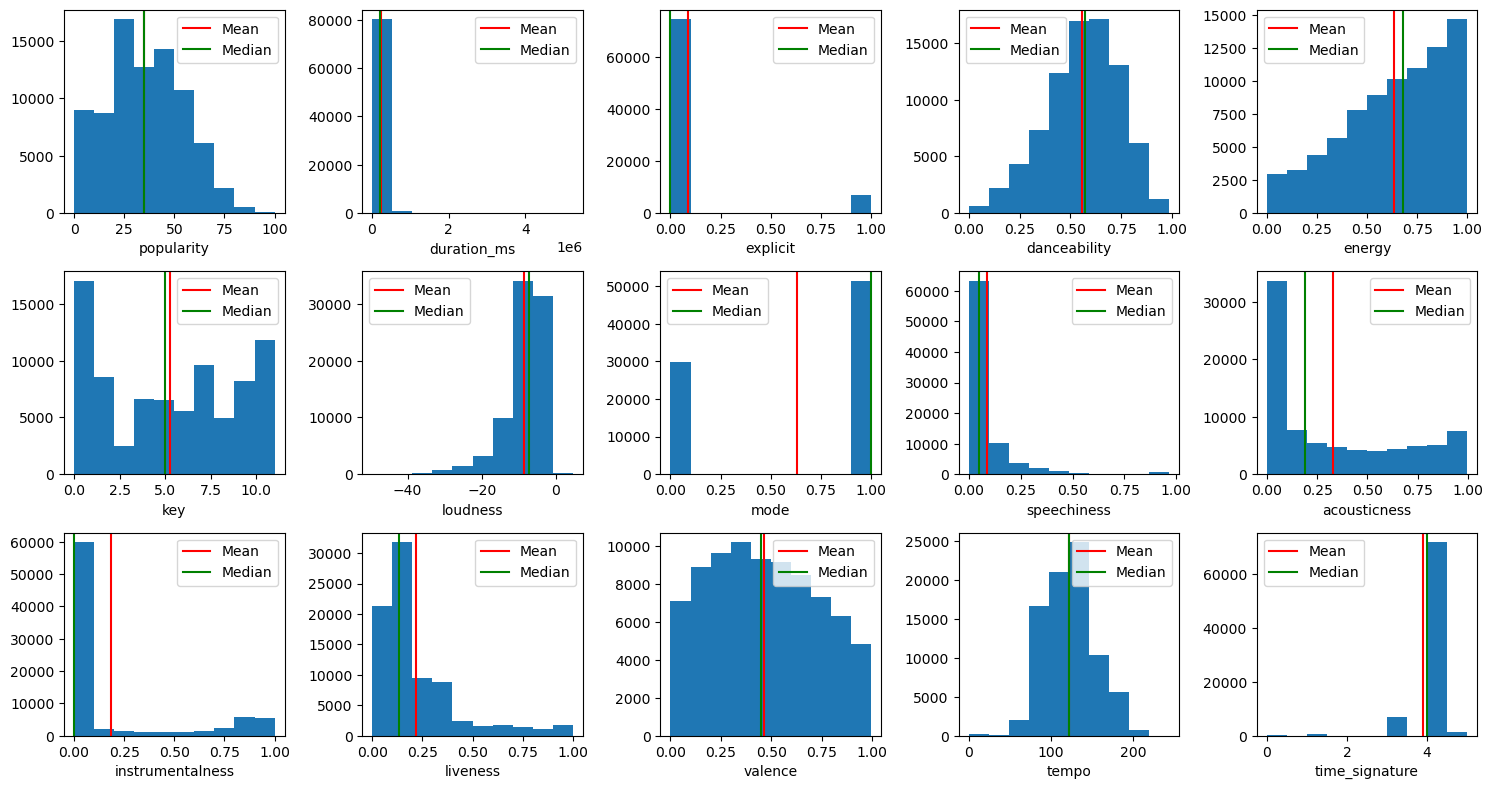

In [56]:
# grid of plots
plt.subplots(3,5, figsize=(15,8))

plot_num = 1 

# Looping through numeric columns
for col in feature_names:
        
    feature = spotify_cleaned[col]
    feature_mean = feature.mean()
    feature_median = feature.median()
    
    plt.subplot(3,5,plot_num)
    plt.hist(feature)
    plt.axvline(feature_mean, c='r', label='Mean')
    plt.axvline(feature_median, c='g', label='Median')
    plt.legend()
    plt.xlabel(col)
    
        
    plot_num +=1
    
plt.tight_layout()

plt.show()


We some some fairy a decent number of normally distributed features, including 
- popularity 
- danceability 
- energy
- valence
- tempo

We do see a number of right-skewed columns. Let's quantify 'right-skewed' and apply a log to those that qualify. 

In [57]:
spotify_cleaned_original = spotify_cleaned.copy() #default = hard copy

In [58]:
# Grabbing mean and median from all of our fe
features.describe().filter(['mean', '50%'], axis=0) #filter grabs out row-wise indexes by name

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
mean,34.636392,231414.497117,0.559276,0.635025,5.2859,-8.59393,0.632347,0.088993,0.329666,0.184733,0.219723,0.463277,122.144834,3.896967
50%,35.000000,215205.000000,0.573000,0.678000,5.0000,-7.26200,1.000000,0.049100,0.190000,0.000089,0.133000,0.449000,122.030000,4.000000


In [59]:
dist_df = features.describe().filter(['mean', '50%'], axis=0).T

In [60]:
dist_df

,mean,50%
popularity,34.636392,35.000000
duration_ms,231414.497117,215205.000000
danceability,0.559276,0.573000
energy,0.635025,0.678000
key,5.285900,5.000000
loudness,-8.593930,-7.262000
mode,0.632347,1.000000
speechiness,0.088993,0.049100
acousticness,0.329666,0.190000
instrumentalness,0.184733,0.000089


In [61]:
# Quantifying how much larger mean is than median
dist_df['ratio'] = dist_df['mean']/dist_df['50%'] 

In [62]:
dist_df.sort_values('ratio', ascending=False)

,mean,50%,ratio
instrumentalness,0.184733,0.000089,2082.673304
speechiness,0.088993,0.049100,1.812479
acousticness,0.329666,0.190000,1.735083
liveness,0.219723,0.133000,1.652053
loudness,-8.593930,-7.262000,1.183411
duration_ms,231414.497117,215205.000000,1.075321
key,5.285900,5.000000,1.057180
valence,0.463277,0.449000,1.031797
tempo,122.144834,122.030000,1.000941
popularity,34.636392,35.000000,0.989611


In [63]:
#create a list of the columns that are right skewed, 
# as defined by having a mean:median ratio > 1

right_skew = dist_df[dist_df['ratio']>1].index #these require a logarithmic transformation
non_skew = dist_df[dist_df['ratio']<=1].index #these can be left alone

In [64]:
right_skew

Index(['duration_ms', 'key', 'loudness', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo'],
      dtype='object')

In [65]:
non_skew

Index(['popularity', 'danceability', 'energy', 'mode', 'time_signature'], dtype='object')

In [66]:
#this transforms all of the columns in the RightSkew list with a log transformation
#for col in right_skew: 
#    spotify_cleaned[col] = np.log(spotify_cleaned[col]+1)

Let's take a look at our new log transformed distributions. 

In [67]:
'''# grid of plots
plt.subplots(3,5, figsize=(15,8))

plot_num = 1 

# Looping through numeric columns
for col in feature_names:
        
    feature = spotify_cleaned[col]
    feature_mean = feature.mean()
    feature_median = feature.median()
    
    plt.subplot(3,5,plot_num)
    plt.hist(feature)
    plt.axvline(feature_mean, c='r', label='Mean')
    plt.axvline(feature_median, c='g', label='Median')
    plt.legend()
    plt.xlabel(col)
    
        
    plot_num +=1
    
plt.tight_layout()

plt.show()'''

"# grid of plots\nplt.subplots(3,5, figsize=(15,8))\n\nplot_num = 1 \n\n# Looping through numeric columns\nfor col in feature_names:\n        \n    feature = spotify_cleaned[col]\n    feature_mean = feature.mean()\n    feature_median = feature.median()\n    \n    plt.subplot(3,5,plot_num)\n    plt.hist(feature)\n    plt.axvline(feature_mean, c='r', label='Mean')\n    plt.axvline(feature_median, c='g', label='Median')\n    plt.legend()\n    plt.xlabel(col)\n    \n        \n    plot_num +=1\n    \nplt.tight_layout()\n\nplt.show()"

#### Distribution of target variable: genre 

In [68]:
pd.set_option('display.max_rows', 115)

In [69]:
spotify_cleaned['track_genre'].nunique()

113

In [70]:
spotify_cleaned['track_genre'].value_counts()

track_genre
study                996
black-metal          991
comedy               987
heavy-metal          985
bluegrass            978
forro                968
grindcore            965
malay                965
idm                  958
iranian              958
chicago-house        956
breakbeat            955
cantopop             955
afrobeat             953
new-age              953
disney               952
happy                949
club                 946
sleep                945
anime                942
acoustic             941
kids                 939
ambient              937
tango                935
brazil               928
salsa                926
detroit-techno       920
drum-and-bass        915
deep-house           915
j-idol               915
chill                910
children             888
hardstyle            880
world-music          880
death-metal          878
dub                  877
spanish              876
goth                 873
garage               868
guitar       

After removing duplicates from our data set we lost a genre and now have 113. We can also see the new distriutions of our 113 genres. 

It's hard to say where the cut off is, but at some value, say 650, we can apply weights to those values. The other spotify playlist is also a possibility. The genres in that dataset include: 
- absolute music 
- classical
- electronic 
- folk
- hiphop
- jazz
- popular
- rnb
- rock

It looks like there are a considerable amount of genres that we will remove (i.e. sleep, study, kids, disney, etc.). It's also possible to consolidate genres. Most of the genres in this dataset have the potential to be combined with another - this way we don't lose anymore data after removing some of the genres. 

The combination of combining datasets and consolidating should help the loss of data. 

Some examples of where we can combine: 

- opera and classical music 
- all 'rock' genres (including goth) - might be good to distinguish between some of these
    - goth is and death metal very very different then say, classic rock
- eliminate study music? or combine with ambient? listen to these 
- eliminate any genre titled with a langauge: iranian, spanish, brazilian (becareful w/this), indian (also be careful with this one), world music?, 
    - if it seems like these genres are music representing the 'historic' or 'original' music we can reconsider this. 
- kids and disney 
- electronic music, EDM, techno, dub

Some of the subgenres can vary greatly from one another so, we will have to find a way to quantify putting some of them together so that we are not just creating more noise in the data. 

Let's check correlations and then in addition to that, let's visualize the relationship between some variables that *we think* might be important when it comes to genre - danceability, instrumentalness (for certain genres), tempo, key (this one is tough), etc. 

#### CORRELATIONS

In [71]:
correlations = features.corr()

In [72]:
correlations

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
popularity,1.000000,-0.053321,0.063766,0.087245,-0.000871,0.004427,0.090162,-0.004927,-0.064913,-0.032143,-0.174509,-0.028974,0.011323,0.001891,0.038559
duration_ms,-0.053321,1.000000,-0.066693,-0.060165,0.058394,0.011665,0.002400,-0.035648,-0.063688,-0.106275,0.109759,0.005601,-0.140941,0.024062,0.021333
explicit,0.063766,-0.066693,1.000000,0.110876,0.101717,0.002307,0.107074,-0.028066,0.337448,-0.083689,-0.116285,0.045489,-0.000757,-0.005790,0.036492
danceability,0.087245,-0.060165,0.110876,1.000000,0.134654,0.032583,0.264934,-0.059299,0.108294,-0.167829,-0.191535,-0.132784,0.492132,-0.015470,0.206450
energy,-0.000871,0.058394,0.101717,0.134654,1.000000,0.042777,0.761042,-0.069535,0.139823,-0.731108,-0.186446,0.190931,0.253953,0.260840,0.181097
key,0.004427,0.011665,0.002307,0.032583,0.042777,1.000000,0.033895,-0.145019,0.013293,-0.041848,-0.003634,-0.002775,0.023814,0.005688,0.014993
loudness,0.090162,0.002400,0.107074,0.264934,0.761042,0.033895,1.000000,-0.035465,0.054019,-0.582132,-0.434393,0.080270,0.289951,0.234033,0.193658
mode,-0.004927,-0.035648,-0.028066,-0.059299,-0.069535,-0.145019,-0.035465,1.000000,-0.035567,0.084144,-0.050497,0.018166,0.024349,-0.001603,-0.023201
speechiness,-0.064913,-0.063688,0.337448,0.108294,0.139823,0.013293,0.054019,-0.035567,1.000000,0.012316,-0.106998,0.231626,0.035074,-0.003208,-0.011022
acousticness,-0.032143,-0.106275,-0.083689,-0.167829,-0.731108,-0.041848,-0.582132,0.084144,0.012316,1.000000,0.095258,-0.016355,-0.101706,-0.223598,-0.173610


Let's look at which of our variables are specifically related with genre. 

**can't look at which are correlated with genre because it's not a numeric column 

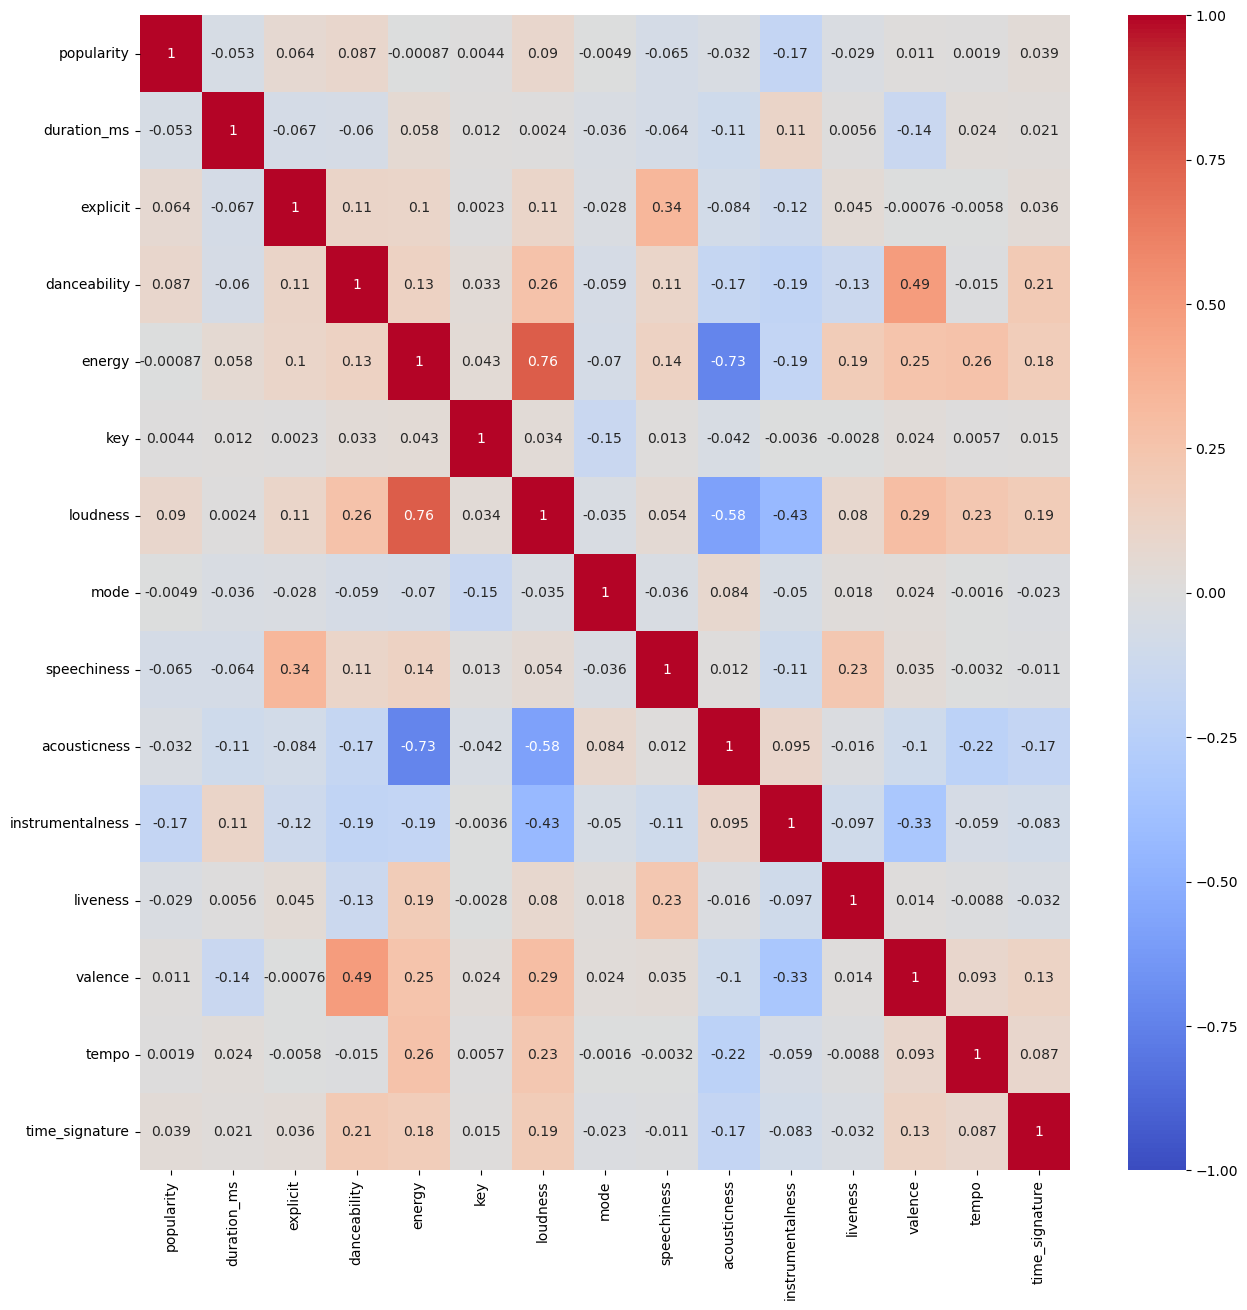

In [73]:
plt.figure(figsize=(15,15)) 
sns.heatmap(correlations, annot=True, center = 0, vmin=-1, vmax=1, cmap='coolwarm')
plt.show()

**Observations:**

There aren't many strong correlations. 

The two stronger positive relationships are between `loudness` and `energy` and `danceability` and `energy`. 

The two stronger negative relationships are between `acousticness` and `energy` and `acousticness and loudness`. 

For logistic modeling, we may need to remove some features to avoid collinearity depending on whether we use a dimension reducer that accounts for that. For our baseline model, it's ok to leave it in.  

Overall, `danceability`, `energy`, and `loudness` seem to have the most positive correlations - not strong, but correlations nonetheless. 
  



### NEXT STEPS

**Our unique genres:**

In [74]:
spotify_cleaned['track_genre'].unique()

array(['acoustic', 'afrobeat', 'alt-rock', 'alternative', 'ambient',
       'anime', 'black-metal', 'bluegrass', 'blues', 'brazil',
       'breakbeat', 'british', 'cantopop', 'chicago-house', 'children',
       'chill', 'classical', 'club', 'comedy', 'country', 'dance',
       'dancehall', 'death-metal', 'deep-house', 'detroit-techno',
       'disco', 'disney', 'drum-and-bass', 'dub', 'dubstep', 'edm',
       'electro', 'electronic', 'emo', 'folk', 'forro', 'french', 'funk',
       'garage', 'german', 'gospel', 'goth', 'grindcore', 'groove',
       'grunge', 'guitar', 'happy', 'hard-rock', 'hardcore', 'hardstyle',
       'heavy-metal', 'hip-hop', 'honky-tonk', 'house', 'idm', 'indian',
       'indie-pop', 'indie', 'industrial', 'iranian', 'j-dance', 'j-idol',
       'j-pop', 'j-rock', 'jazz', 'k-pop', 'kids', 'latin', 'latino',
       'malay', 'mandopop', 'metal', 'metalcore', 'minimal-techno', 'mpb',
       'new-age', 'opera', 'pagode', 'party', 'piano', 'pop-film', 'pop',
       'pow

Going forward, we will run some baseline models and further explore our genres during the process of genre consildation. It's really important to understand the genres, how they may relate to one another, before consolidating because combining the dissimliar genres will lead to extra noise and/or misclassification. 

***
**TABLE OF CONTENTS**

[Introduction](#Cleaning-&-EDA-on-Spotify-Dataset-#2)

[Preliminary EDA](#PRELIMINARY-EDA)

[Missing Values and Duplicates](#MISSING-VALUES-AND-DUPLICATES)

[Distributions and Correlations](#DISTRIBUTIONS-AND-CORRELATIONS)

[Next Steps](#NEXT-STEPS)
***